<a href="https://colab.research.google.com/github/Swati55/Fake_News_Classification/blob/main/NLP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#Loading Datasets (upload on colab first)



In [ ]:
fake_df = pd.read_csv('Fake.csv')
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_df =pd.read_csv("True.csv")
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#Getting to know the data. Checking for null values, duplicates and cleaning the data to use in further processing

In [ ]:
fake_df.info    #details about structure and memory of dataframe

<bound method DataFrame.info of                                                    title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23476  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23477  21st Century Wire says It s a familiar theme. ...  Middle-east   
23478  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23479  21st Century Wire says Al Jazeera America will...  Middle-east   
23480  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date  
0      December 31, 2017  
1      December 31, 2017  
2      December 30, 2017  
3      December 29, 2017  
4      December 25, 2017  
...                  ...  
23476   January 16, 2016  
23477   January 16, 2016  
23478   January 15, 2016  
23479   January 14, 2016  
23480   January 12, 2016  

[23481 rows x 4 columns]>

In [ ]:
true_df.info

<bound method DataFrame.info of                                                    title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]>

In [ ]:
#shape
print("Shape of True_Df :", true_df.shape)
print("Shape of Fake_DF :", fake_df.shape, "\n")

#column
print("Columns of True_Df :", true_df.columns)
print("Columns of Fake_Df :", fake_df.columns,"\n")

#dulpicated rows
true_df.duplicated()  #it is boolean val for each row
print("Duplicated rowa for true df :", true_df.duplicated().sum())
print("Duplicated rowa for fake df :", fake_df.duplicated().sum(), "\n")

#examining date column
print("Datatype of date column :", true_df['date'].dtype)
#we will change the datatype to date after concatenation

Shape of True_Df : (21417, 4)
Shape of Fake_DF : (23481, 4) 

Columns of True_Df : Index(['title', 'text', 'subject', 'date'], dtype='object')
Columns of Fake_Df : Index(['title', 'text', 'subject', 'date'], dtype='object') 

Duplicated rowa for true df : 206
Duplicated rowa for fake df : 3 

Datatype of date column : object


In [ ]:
#dropping duplicated rows
true_df = true_df.drop_duplicates()
fake_df = fake_df.drop_duplicates()
print("Duplicated rows removed from both the datasets \n")

#shape of updated dataframe
print("Shape of True_Df :", true_df.shape)
print("Shape of Fake_DF :", fake_df.shape, "\n")

Duplicated rows removed from both the datasets 

Shape of True_Df : (21211, 4)
Shape of Fake_DF : (23478, 4) 



In [ ]:
#null values
true_df.isna().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
fake_df.isnull().sum()

,0
title,0
text,0
subject,0
date,0


#Combining two dataframes

In [ ]:
#Add additional label column in both the dfs
true_df.loc[:,'label'] =1
fake_df.loc[:,'label'] =0

#or we can also do but its giving some
#true_df['label']= 1
#fake_df['label']= 0

<ipython-input-13-7d19e6bdc5fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_df.loc[:,'label'] =1
<ipython-input-13-7d19e6bdc5fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_df.loc[:,'label'] =0


In [ ]:
#concat now
df = pd.concat([true_df,fake_df])

In [ ]:
print("Shape of df :",df.shape)
print("Columns of df :" ,df.columns)
print("label vals :" ,df['label'].unique())

df.tail(5)

Shape of df : (44689, 5)
Columns of df : Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')
label vals : [1 0]


,title,text,subject,date,label
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
#shuffle the rows and update the index
df = df.sample(frac=1).reset_index(drop=True)
df

,title,text,subject,date,label
0,Boiler Room #93 – The Outgoing Head of Hydra,Tune in to the Alternate Current Radio Network...,US_News,"January 19, 2017",0
1,Trump’s Logo Failed So Miserably He Removed A...,Donald Trump announced Indiana governor Mike P...,News,"July 16, 2016",0
2,North Korea's nuclear scientists take center s...,SEOUL (Reuters) - Decorated by Pyongyang but b...,worldnews,"September 4, 2017",1
3,EU reopens feud over quotas for hosting refugees,BRUSSELS (Reuters) - Rivals from the two sides...,worldnews,"December 13, 2017",1
4,LAUGHABLE! MAXINE WATERS On Why She Wants To I...,,politics,"Jan 16, 2017",0
...,...,...,...,...,...
44684,IF YOU CROSS OUR BORDERS ILLEGALLY….YOU CAN NO...,We re going to have people who are bilingual ...,left-news,"May 18, 2015",0
44685,Region must do more to pressure South Sudan le...,WASHINGTON (Reuters) - African countries shoul...,worldnews,"September 13, 2017",1
44686,DEMOCRATS THREATEN KIDS EDUCATION: CHICAGO TEA...,It s painful to watch the stupidity and irresp...,politics,"Jun 24, 2015",0
44687,‘Unable To Sleep’ NFL Quarterback Regrets Not ...,The man who won two Super Bowls for the city o...,politics,"Sep 25, 2017",0


In [ ]:
print("Datatype of date column :", df['date'].dtype)

Datatype of date column : object


#data summary using plots

<ipython-input-18-d457f5ab824b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data =df, palette = 'magma')


<Axes: xlabel='label', ylabel='count'>

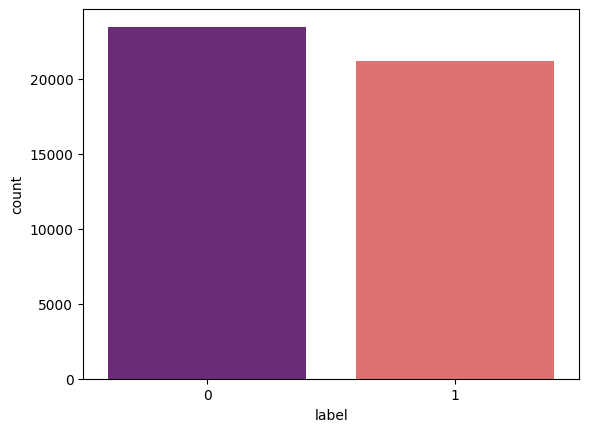

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px     #for interactive plots
import plotly.graph_objects as go #for interactive plots

plt.figure()
sns.countplot(x='label', data =df, palette = 'magma')

<ipython-input-19-cc0db697157a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'subject', data =df, palette='hls')


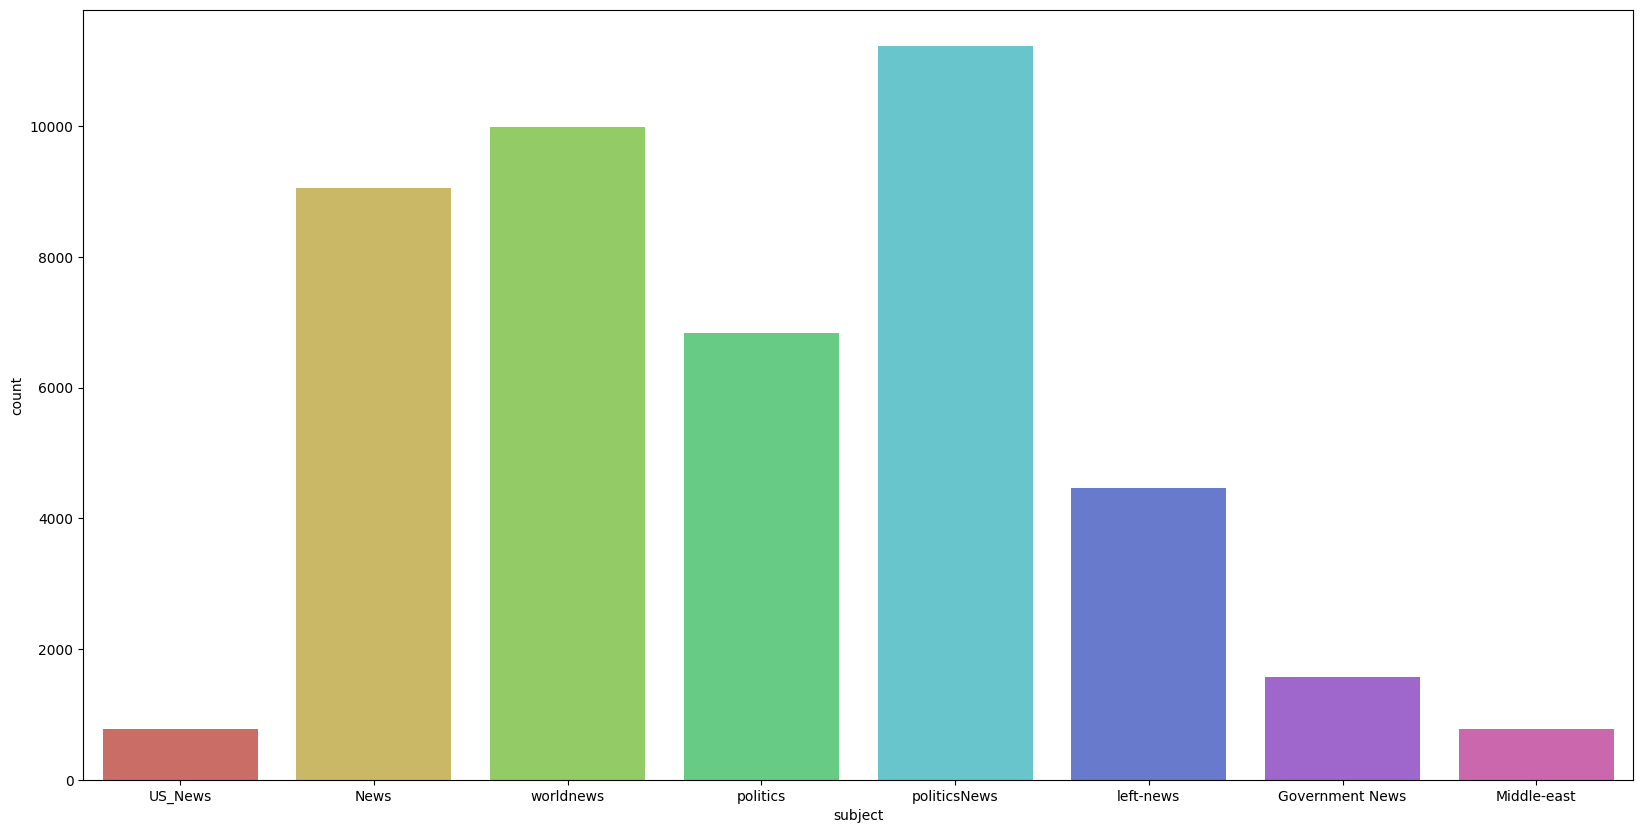

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x= 'subject', data =df, palette='hls')
plt.show()

#Text processing

In [ ]:
#joining title and text

df['news'] = df['title']+' '+ df['text']
df['news']

,news
0,Boiler Room #93 – The Outgoing Head of Hydra T...
1,Trump’s Logo Failed So Miserably He Removed A...
2,North Korea's nuclear scientists take center s...
3,EU reopens feud over quotas for hosting refuge...
4,LAUGHABLE! MAXINE WATERS On Why She Wants To I...
...,...
44684,IF YOU CROSS OUR BORDERS ILLEGALLY….YOU CAN NO...
44685,Region must do more to pressure South Sudan le...
44686,DEMOCRATS THREATEN KIDS EDUCATION: CHICAGO TEA...
44687,‘Unable To Sleep’ NFL Quarterback Regrets Not ...


In [ ]:
df_new = df.copy()
df_new.head()

,title,text,subject,date,label,news
0,Boiler Room #93 – The Outgoing Head of Hydra,Tune in to the Alternate Current Radio Network...,US_News,"January 19, 2017",0,Boiler Room #93 – The Outgoing Head of Hydra T...
1,Trump’s Logo Failed So Miserably He Removed A...,Donald Trump announced Indiana governor Mike P...,News,"July 16, 2016",0,Trump’s Logo Failed So Miserably He Removed A...
2,North Korea's nuclear scientists take center s...,SEOUL (Reuters) - Decorated by Pyongyang but b...,worldnews,"September 4, 2017",1,North Korea's nuclear scientists take center s...
3,EU reopens feud over quotas for hosting refugees,BRUSSELS (Reuters) - Rivals from the two sides...,worldnews,"December 13, 2017",1,EU reopens feud over quotas for hosting refuge...
4,LAUGHABLE! MAXINE WATERS On Why She Wants To I...,,politics,"Jan 16, 2017",0,LAUGHABLE! MAXINE WATERS On Why She Wants To I...


In [ ]:
#remove punctuations, convert text to lowercase

import string
def lcase_nospace(text):
  """
  converts the text to lower case. removes leading and trailing whitespaces,tabs,enter
  """
  text = text.lower()
  return text.strip()

def punch(text):
  """
  removes punctuations

  """
  cleanedtext = "".join([i for i in text if i not in string.punctuation])
  return cleanedtext

def efficient_punch(text):      # ' are “with her” then  ' this part wasnt removed by 1st 2 functions
  """
  removes punctuations efficiently an faster

  """
  translator = str.maketrans('','',string.punctuation)
  return text.translate(translator)


import re              ##regular experessions
def eff_punch2(text):
  return re.sub(r'[^\w\s]','',text)   #substitute everything that is not white space and words with null value

In [ ]:
#apply the function
df_new['news'] = df_new['news'].apply(lambda x: lcase_nospace(x))
df_new['news'] = df_new['news'].apply(lambda x : eff_punch2(x))
df_new['news']

,news
0,boiler room 93 the outgoing head of hydra tun...
1,trumps logo failed so miserably he removed all...
2,north koreas nuclear scientists take center st...
3,eu reopens feud over quotas for hosting refuge...
4,laughable maxine waters on why she wants to im...
...,...
44684,if you cross our borders illegallyyou can now ...
44685,region must do more to pressure south sudan le...
44686,democrats threaten kids education chicago teac...
44687,unable to sleep nfl quarterback regrets not st...


In [ ]:
#remove stop words
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')
stopwords =nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
  """ removes and/the/of etc """
  sentence = " ".join(i for i in text.split() if i not in stopwords)
  return sentence


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#apply function
df_new['news']=df_new['news'].apply(lambda x: remove_stopwords(x))
df_new['news']

,news
0,boiler room 93 outgoing head hydra tune altern...
1,trumps logo failed miserably removed trace one...
2,north koreas nuclear scientists take center st...
3,eu reopens feud quotas hosting refugees brusse...
4,laughable maxine waters wants impeach trump video
...,...
44684,cross borders illegallyyou land job teaching s...
44685,region must pressure south sudan leaders end c...
44686,democrats threaten kids education chicago teac...
44687,unable sleep nfl quarterback regrets standing ...


In [ ]:
#tokenize and stem-
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
nltk.download('punkt')
def stem_sen(sentence):
  """ """
  if isinstance(sentence,str):
    words = word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)
  return sentence

##note : this is taking too much time, may require to form a better function for
## stemming and tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#apply function
df_new['news']=df_new['news'].apply(lambda x: stem_sen(x))
df_new['news']

#note that religious becomes relig after stemming, it is because we're using porter stemming. We can try lemmantization but its slower

,news
0,boiler room 93 outgo head hydra tune altern cu...
1,trump logo fail miser remov trace one day mock...
2,north korea nuclear scientist take center stag...
3,eu reopen feud quota host refuge brussel reute...
4,laughabl maxin water want impeach trump video
...,...
44684,cross border illegallyy land job teach state g...
44685,region must pressur south sudan leader end con...
44686,democrat threaten kid educ chicago teacher uni...
44687,unabl sleep nfl quarterback regret stand natio...


In [ ]:
#remove brackets
def brac(text):
  text = re.sub('\[.*\]', '', text).strip()
  text = re.sub('\S*\d\S*\s*','',text).strip()
  return text.strip()

#remove urls
def urls(vTEXT):
  vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*b', '',vTEXT,flags =re.MULTILINE)
  return(vTEXT)

#remove digits
def digit(text):
  text = re.sub(r'\b[0-9]+\b\s*','',text)
  return text

#remove emojis
def emojis(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               "]+", flags=re.UNICODE)
    return re.sub(emoji_pattern, '', data)

In [ ]:
#apply functions

df_new['news']=df_new['news'].apply(lambda x: brac(x))
df_new['news']=df_new['news'].apply(lambda x: urls(x))
df_new['news']=df_new['news'].apply(lambda x: digit(x))
df_new['news']=df_new['news'].apply(lambda x: emojis(x))

#Remove single alphabetic characters surrounded by spaces
df_new['news'] = df_new['news'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', '', x))

#Replace multiple spaces with a single space
df_new['news'] = df_new['news'].apply(lambda x: re.sub(r'\s+', ' ', x))


In [ ]:
#final df
df_new =df_new[['news', 'label']]
df_new

,news,label
0,boiler room outgo head hydra tune altern curre...,0
1,trump logo fail miser remov trace one day mock...,0
2,north korea nuclear scientist take center stag...,1
3,eu reopen feud quota host refuge brussel reute...,1
4,laughabl maxin water want impeach trump video,0
...,...,...
44684,cross border illegallyy land job teach state g...,0
44685,region must pressur south sudan leader end con...,1
44686,democrat threaten kid educ chicago teacher uni...,0
44687,unabl sleep nfl quarterback regret stand natio...,0


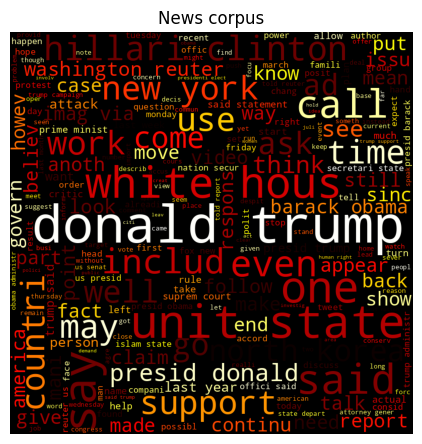

In [ ]:
#wordcloud
onebigstr =' '.join(df_new['news'])
wordcloud_img = WordCloud(width = 800,height =800,
                          max_words =2000,
                          background_color = 'black',
                          colormap = 'hot_r',
                          min_font_size=10).generate(onebigstr)
plt.figure()
plt.imshow(wordcloud_img)
plt.axis('off')
plt.title('News corpus')
plt.tight_layout(pad=2)
plt.show()

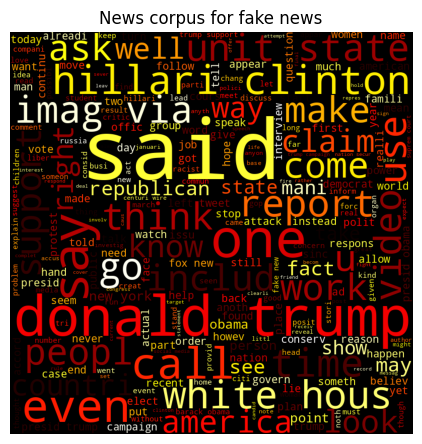

In [ ]:
#wordcloud - fake news
onebigstr_fake =' '.join(df_new[df_new['label']== 0]['news'])
wordcloud_img_fake = WordCloud(width = 800,height =800,
                          max_words =2000,
                          background_color = 'black',
                          colormap = 'hot_r',
                          min_font_size=10).generate(onebigstr_fake)
plt.figure()
plt.imshow(wordcloud_img_fake)
plt.axis('off')
plt.title('News corpus for fake news')
plt.tight_layout(pad=2)
plt.show()

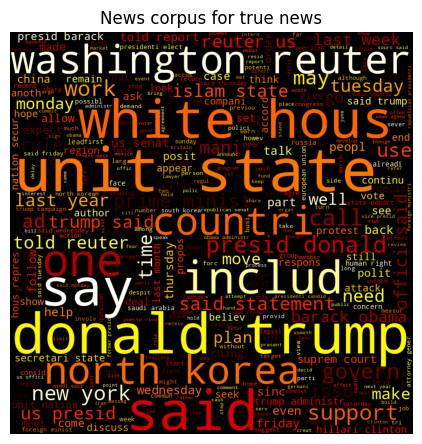

In [ ]:
#wordcloud - true news
onebigstr_real =' '.join(df_new[df_new['label']== 1]['news'])
wordcloud_img_real = WordCloud(width = 800,height =800,
                          max_words =2000,
                          background_color = 'black',
                          colormap = 'hot_r',
                          min_font_size=10).generate(onebigstr_real)
plt.figure()
plt.imshow(wordcloud_img_real)
plt.axis('off')
plt.title('News corpus for true news')
plt.tight_layout(pad=2)
plt.show()

#ML Model Selection and fitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorization
X = df_new['news']
Y =df_new['label']

tfidf_vector = TfidfVectorizer(max_features = 10000)
X_tfidf = tfidf_vector.fit_transform(X)
X_tfidf

<44689x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 6351463 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_tfidf)

  (0, 5128)	0.05769757031972465
  (0, 6324)	0.061987017255441694
  (0, 2600)	0.06562828994743501
  (0, 9580)	0.05185682302198092
  (0, 6889)	0.0485283388587739
  (0, 7959)	0.05180386979285995
  (0, 5111)	0.029366997713869164
  (0, 2241)	0.06642781405875299
  (0, 2663)	0.05759486968522523
  (0, 7143)	0.06191422979837883
  (0, 4158)	0.10186508384789086
  (0, 5455)	0.11594006371216309
  (0, 3182)	0.07376948150993526
  (0, 3635)	0.06524732778613161
  (0, 784)	0.08250763220571836
  (0, 6623)	0.07560913453808396
  (0, 6998)	0.04064257612954296
  (0, 4837)	0.06400840323570564
  (0, 9672)	0.062356439738663526
  (0, 2924)	0.0787595778085341
  (0, 7252)	0.07227982611601572
  (0, 4185)	0.11070853743230266
  (0, 8465)	0.09714413224143449
  (0, 331)	0.07055997341245605
  (0, 2709)	0.09580178860473099
  :	:
  (44688, 4036)	0.04600041664163283
  (44688, 309)	0.04126033558868186
  (44688, 3100)	0.0534935307293929
  (44688, 5780)	0.04904784200198157
  (44688, 5471)	0.048629888112885676
  (44688, 5332)	

In [ ]:
#split data into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, Y, test_size = 0.2,stratify=Y, random_state = 27)

##Logestic Regression Model

In [ ]:
## logistic regression model

from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(random_state =27)

#Model training
lr_classifier.fit(X_train, Y_train)

#Model prediction
Y_cap = lr_classifier.predict(X_test)

#Model accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score, precision_score, recall_score

lr_accuracy = accuracy_score(Y_test, Y_cap)
lr_precision = precision_score(Y_test, Y_cap)
lr_recall = recall_score(Y_test, Y_cap)
lr_f1 = f1_score(Y_test, Y_cap)

print("Accuracy :", lr_accuracy)
print("Precision :", lr_precision)
print("Recall :", lr_recall)
print("F1 score :", lr_f1)

Accuracy : 0.9880286417543075
Precision : 0.9861274394545027
Recall : 0.9886845827439887
F1 score : 0.9874043555032371


In [ ]:
report = classification_report(Y_test, Y_cap)
print("Classification Report :\n", report)

con_matrix = confusion_matrix(Y_test, Y_cap)
print("Confusion Matrix :\n", con_matrix)

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

Confusion Matrix :
 [[4637   59]
 [  48 4194]]


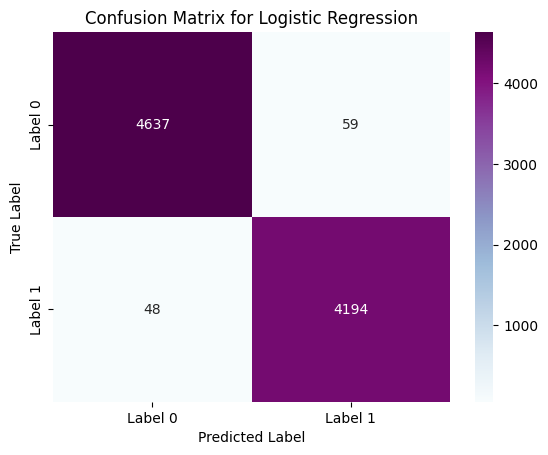

In [ ]:
plt.figure()
sns.heatmap(con_matrix, annot =True, fmt ='d',
            cmap ='BuPu',
            xticklabels =['Label 0', 'Label 1'],
            yticklabels=['Label 0','Label 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

##Decision Tree classification Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Model declaration
dt_classifier = DecisionTreeClassifier(random_state = 27)

#Model training - takes more time that logistic regression
dt_classifier.fit(X_train, Y_train)

#Prediction
y_cap = dt_classifier.predict(X_test)

#accuracy
dt_accuracy =accuracy_score(Y_test,Y_cap)

from sklearn.metrics import precision_recall_fscore_support
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(Y_test,Y_cap, average ='weighted')

#we can try out with average but generally it's useful in multiclass case

Precision : 0.988033105623101
Recall : 0.9880286417543075
F1 score : 0.9880293737816778
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

Confusion Matrix : 
 [[4637   59]
 [  48 4194]]


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

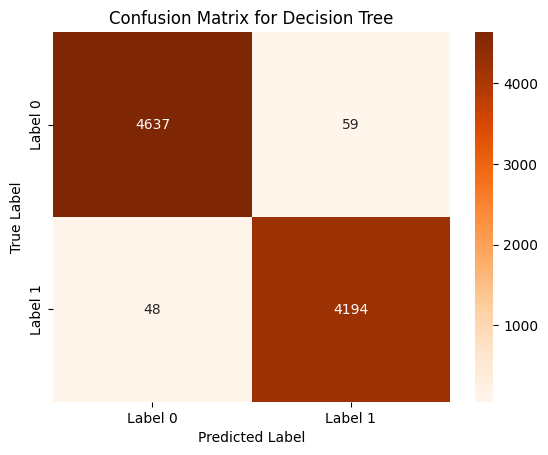

In [ ]:
print('Precision :' , dt_precision)
print('Recall :' , dt_recall)
print('F1 score :' , dt_f1)

dt_report =classification_report(Y_test, Y_cap)
print("Classification Report :\n", dt_report)

dt_con_matrix= confusion_matrix(Y_test, Y_cap)
print("Confusion Matrix : \n", dt_con_matrix)

plt.figure()
sns.heatmap(dt_con_matrix,annot =True,fmt='d',
            cmap='Oranges',
            xticklabels =['Label 0','Label 1'],
            yticklabels =['Label 0','Label 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')

##SVM model

In [ ]:
#model
from sklearn.svm import SVC

#training - takes longer time than decision trees
svm_classifier =SVC(kernel='linear', random_state= 42)  #hoping the data is separated by linear decision boundary
svm_classifier.fit(X_train, Y_train)

#prediction
y_cap = svm_classifier.predict(X_test)


SVC(kernel='linear', random_state=42)

Accuracy: 0.9880286417543075
Precision: 0.988033105623101
Recall: 0.9880286417543075
F1 Score: 0.9880293737816778
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4696
           1       0.99      0.99      0.99      4242

    accuracy                           0.99      8938
   macro avg       0.99      0.99      0.99      8938
weighted avg       0.99      0.99      0.99      8938

Confusion Matrix :
 [[4637   59]
 [  48 4194]]


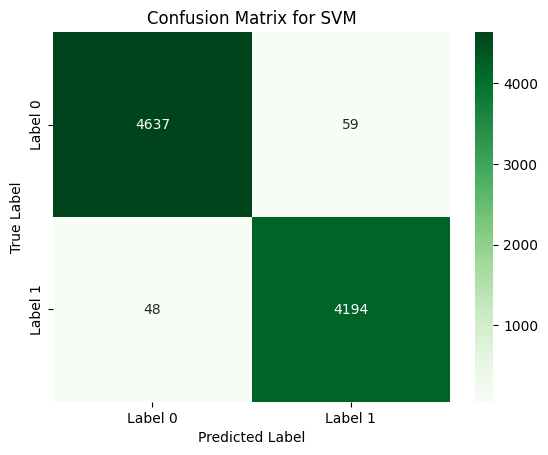

In [ ]:
#accuracy
svm_accuracy = accuracy_score(Y_test, Y_cap)
svm_precision, svm_recall, svm_f1, _ =precision_recall_fscore_support(Y_test, Y_cap, average='weighted')
print("Accuracy:", svm_accuracy)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('F1 Score:', svm_f1)

svm_report = classification_report(Y_test, Y_cap)
print("Classification Report :\n", svm_report)

svm_con_matrix = confusion_matrix(Y_test, Y_cap)
print("Confusion Matrix :\n", svm_con_matrix)

plt.figure()
sns.heatmap(svm_con_matrix, annot =True, fmt ='d',
             cmap ='Greens',
             xticklabels =['Label 0','Label 1'],
            yticklabels =['Label 0','Label 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()

##Accuracy comparison for ML models

In [ ]:
accuracies ={ 'Logistic Regression': lr_accuracy,
             'Decision Trees': dt_accuracy,
              'SVM': svm_accuracy
              }

fig = go.Figure(
    data=[go.Bar(x=list(accuracies.keys()),y=list(accuracies.values()))],
       layout={
           'title' : 'Model Comparison: Accuracy',
           'xaxis' : {'title':'Models'},
           'yaxis': {'title': 'Accuracy'}
       }
)

for model, accuracy in accuracies.items():
  fig.add_annotation(
      x=model,
      y=accuracy,
      text = f'{accuracy: .2f}',
      showarrow=False,
      font=dict(size=12),
      xanchor='center',
      yanchor='bottom',
      yshift = -10
  )

fig.show()


# Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

tokenizer.fit_on_texts(df_new['news'])

sequences = tokenizer.texts_to_sequences(df_new['news'])
padded_sequences = pad_sequences(sequences, maxlen=100,
padding='post', truncating='post')

labels = np.array(df_new['label'])


X_train, X_test, y_train, y_test = train_test_split(padded_sequences,
labels, test_size=0.2, stratify = labels, random_state=42)

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
 ])

model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32,
validation_split=0.2)

y_pred = (model.predict(X_test) > 0.5).astype("int32")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Epoch 1/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9658 - loss: 0.0953 - val_accuracy: 0.9985 - val_loss: 0.0040
Epoch 2/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.9998 - loss: 9.3099e-04 - val_accuracy: 0.9985 - val_loss: 0.0054
Epoch 3/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9999 - loss: 5.9987e-04 - val_accuracy: 0.9965 - val_loss: 0.0179
Epoch 4/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 35s 39ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 0.9973 - val_loss: 0.0113
Epoch 5/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9980 - val_loss: 0.0103
Epoch 6/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 40s 38ms/step - accuracy: 1.0000 - loss: 4.0654e-05 - val_accuracy: 0.9980 - val_loss: 0.0106
Epoch 7/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 40s 37ms/step - accuracy: 1.0000 - loss: 1.4704e-06 - val_accuracy: 0.9982 - val_loss: 0.0107
Epoch 8/10
894/894 ━━━━━━━━━━━━━━━━━━━━ 32s 36ms/step - accuracy: 1.0000 -

Test Accuracy: 99.89%


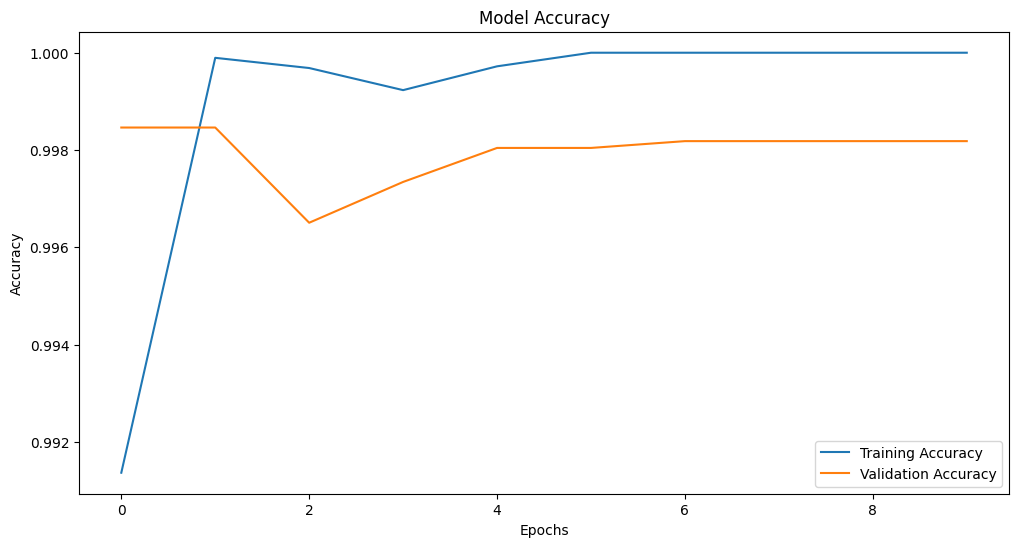

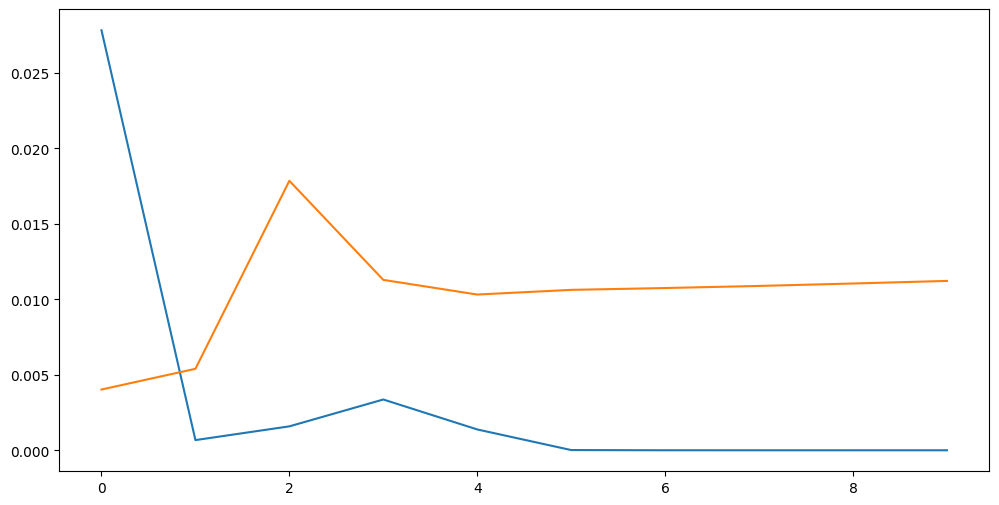

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
